In [1]:
import pandas as pd 
import matplotlib.pyplot as plt

In [2]:
df1 = pd.read_excel("fsn_data_2020_07.XLSX")
df1

,MRP Cont,MATERIAL,OLD MATL No.,Material Type,MRP Controller,Section,FSN ind,SMV ind,DESCR.,UOM,Op.MAP,Cl.MAP,Op.Stock,CS Stock,Cl.Stock,Op.Value,Cl.Value,Variance
0,921.0,3801813.0,0915014620899,ZREF,RED,GEN,F,NaN,"REFMAGNASIA,MGO-C,SUPP&APPL,2500 HEATS",SET,54361952.55,64211975.95,0.000,1.000,1.000,0.000000e+00,6.421198e+07,642.119759
1,942.0,3800723.0,0915060637006,ZREF,SMS1,GEN,F,NaN,TUNDISH REFRACTORY MANAGEMENT FOR SMS1,EA,108593.38,103145.82,288.000,706.000,706.000,3.127489e+07,7.282095e+07,415.460524
2,959.0,3800751.0,0915007651801,ZREF,SMS2,GEN,F,NaN,TOTAL OPERATIONAL REFRACTORY MANAGEMENT,EA,12473.16,12112.52,0.000,1200.000,1200.000,0.000000e+00,1.453502e+07,145.350194
3,942.0,3030788.0,2104000070699,HIBE,SMS1,RM1,S,L,"WIRE,RND,FERRO CALCIUM,13±0.5 mm,BY COIL",TO,118550.00,110050.00,0.000,130.972,130.972,0.000000e+00,1.441347e+07,144.134686
4,959.0,2137980.0,3491375401699,ERSA,SMS2,OPR,S,L,"NOZL,AIR MIST FULL CONE,3 LITRES/MIN",EA,0.00,10917.08,0.000,1200.000,1200.000,0.000000e+00,1.310049e+07,131.004939
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57010,938.0,3002509.0,0400800726208,HIBE,GENL-NON AR,GEN,F,NaN,SULPHURIC ACID,TO,6052.77,6433.92,3567.960,0.000,1913.360,2.159606e+07,1.231040e+07,-92.856562
57011,902.0,3009025.0,2000301211003,HIBE,SMD M-2,GEN,F,NaN,"BELT,CONV,M24,1200MM,1000/4,6X2MM",M,3706.10,3706.10,12996.000,9396.000,9396.000,4.816446e+07,3.482250e+07,-133.419547
57012,938.0,3023872.0,0503450000301,HIBE,GENL-NON AR,GEN,F,NaN,STEEL STRAP (BLACK IN COLOUR) FOR STRAP,TO,87152.90,87152.90,1043.304,522.106,837.424,9.092697e+07,7.298393e+07,-179.430394
57013,959.0,2083556.0,3491262101099,ERSA,SMS2,OPR,F,NaN,"TUBE,COPPER,1000MM, 150 SQ.",EA,272539.12,272539.12,261.000,142.000,142.000,7.113271e+07,3.870056e+07,-324.321556


In [3]:
grouped = df1.groupby('MRP Controller')

group_dataframes = []
for group_name, group_df in grouped:
    group_dataframes.append(group_df)

sum_values = []
for group_df in group_dataframes:
    sum_values.append((group_df['Cl.Value'].sum())/100000)

result_df = pd.DataFrame({'MRP_Controller': grouped.groups.keys(), 'Cl.Value': sum_values})

print(result_df)

     MRP_Controller     Cl.Value
0         ACS DEPTT   265.609555
1              AR-1   480.076749
2              AR-2   884.919845
3              AR-3   845.738876
4              AR-4   356.778439
5                BF  5590.611557
6       Blank MRP-C   700.817775
7               CCP   178.922985
8               CED    45.172855
9               CME     0.357905
10               CO  1182.915324
11              CRG  2105.157645
12             CRMP   327.094360
13              DNW   367.773639
14              EMD   302.884311
15              ERS    85.978621
16               ES   423.617793
17              ETL    74.576490
18             EnMD   112.705557
19             FDRY    10.427570
20              FMD   514.142836
21      GENL-NON AR  9443.752657
22  INSTRUMENTATION   587.431064
23               IT    17.302798
24              L&H  1084.146665
25             LMMM   987.216830
26             MMSM   913.690486
27               PD     8.542835
28          QA & TD    45.608491
29        

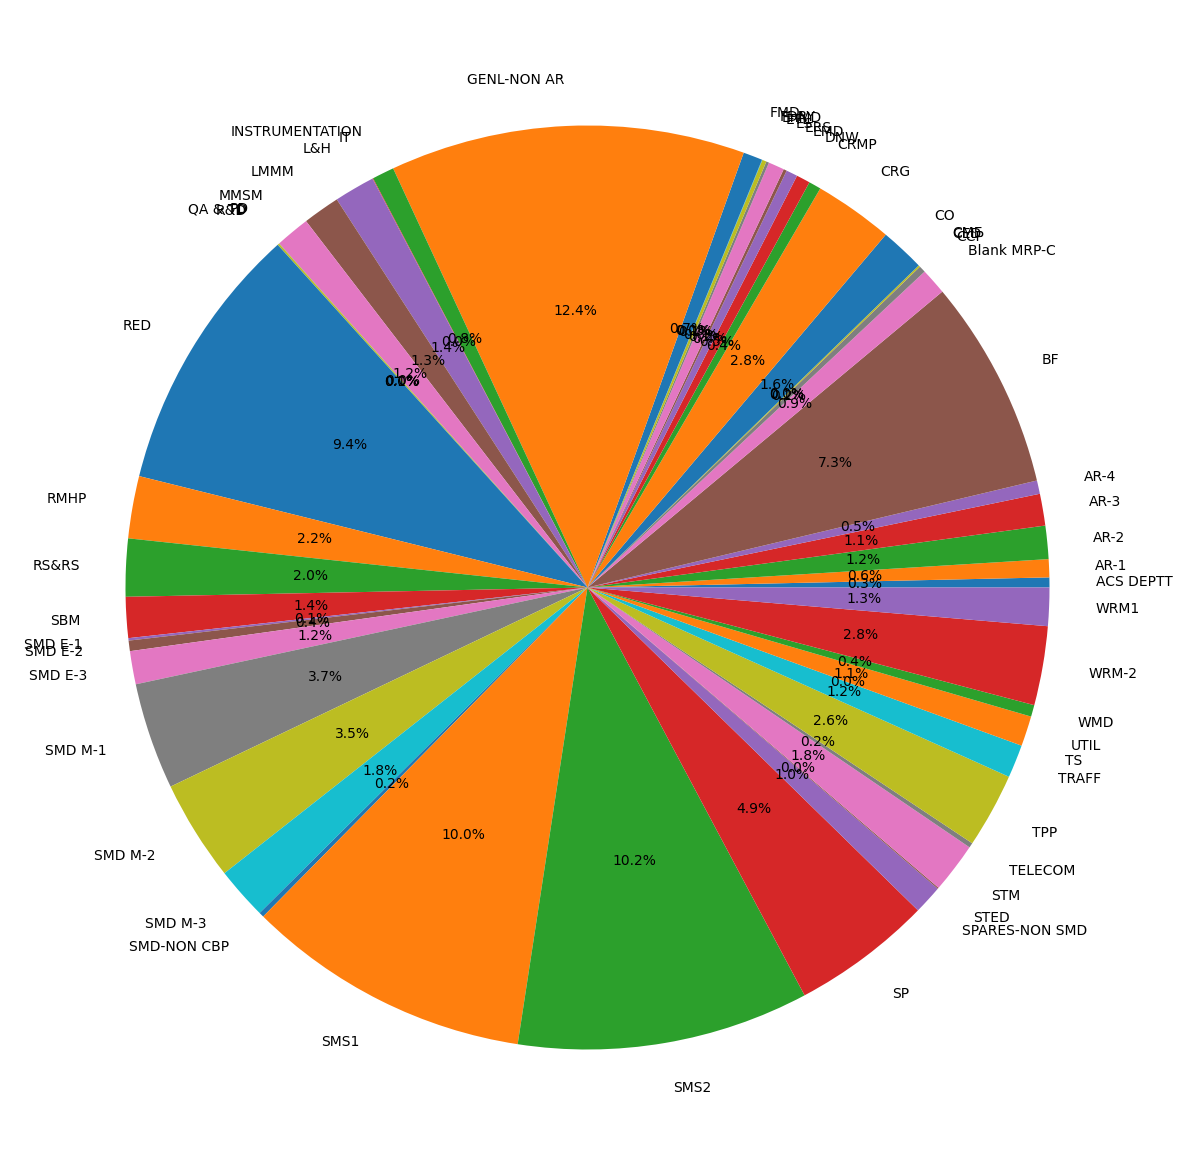

In [4]:
cont=result_df['MRP_Controller']
cl= result_df['Cl.Value']

plt.figure(figsize=(30,15))
plt.pie(cl,labels=cont,autopct="%.1f%%")
plt.show()

In [5]:
grouped = df1.groupby('Material Type')

group_dataframes = []
for group_name, group_df in grouped:
    group_dataframes.append(group_df)

sum_values = []
for group_df in group_dataframes:
    sum_values.append((group_df['Cl.Value'].sum())/100000)

result_df1 = pd.DataFrame({'Material_type': grouped.groups.keys(), 'Cl.Value': sum_values})

print(result_df1)

  Material_type      Cl.Value
0          ERSA  43982.851373
1          HIBE  18111.214780
2          ZCAP     92.535168
3          ZFMD    531.129675
4          ZREF  13429.433827


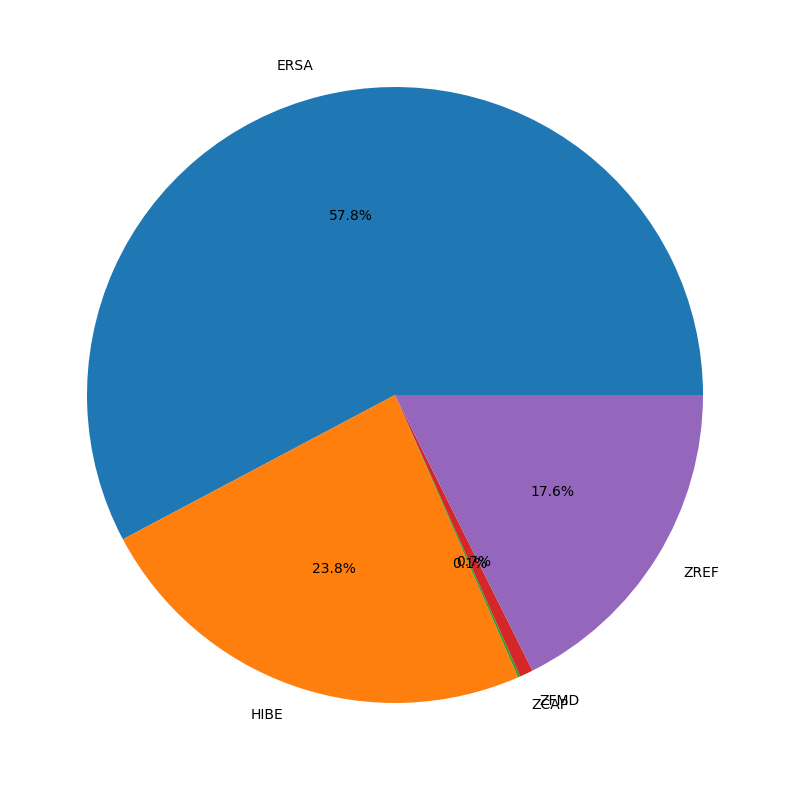

In [6]:
mtype=result_df1['Material_type']
cl= result_df1['Cl.Value']

plt.figure(figsize=(20,10))
plt.pie(cl,labels=mtype,autopct="%.1f%%")
plt.show()

In [7]:
grouped = df1.groupby('Section')

group_dataframes = []
for group_name, group_df in grouped:
    group_dataframes.append(group_df)

sum_values = []
for group_df in group_dataframes:
    sum_values.append((group_df['Cl.Value'].sum())/100000)

result_df2 = pd.DataFrame({'Section': grouped.groups.keys(), 'Cl.Value': sum_values})

print(result_df2)

  Section      Cl.Value
0     ELE   4823.551590
1     GEN  36337.729867
2     MEC  25854.074924
3     OPR   8077.245303
4     RM1   1054.563137


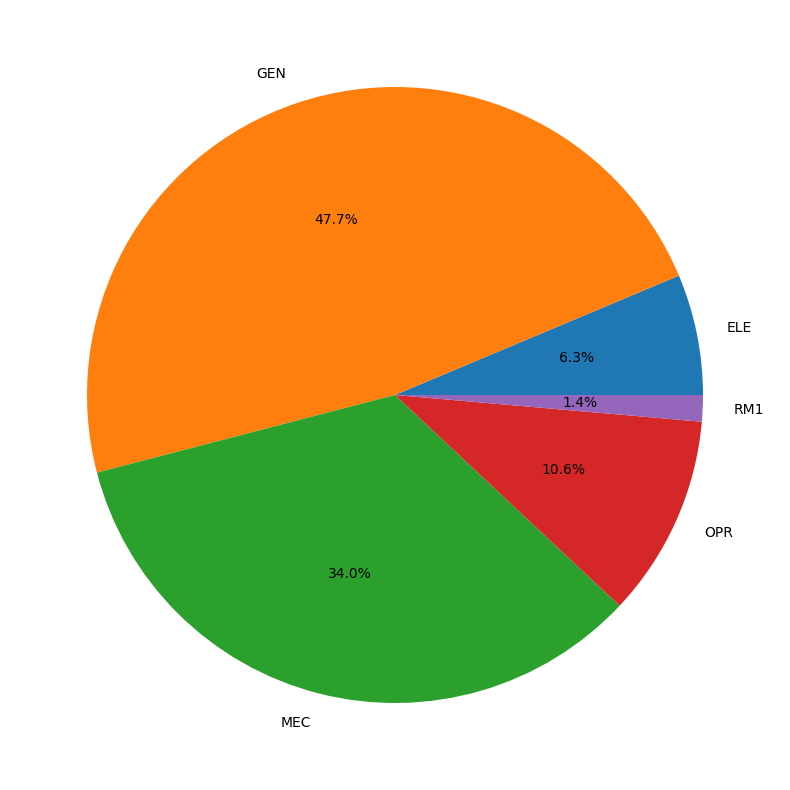

In [8]:
section=result_df2['Section']
cl= result_df2['Cl.Value']

plt.figure(figsize=(20,10))
plt.pie(cl,labels=section,autopct="%.1f%%")
plt.show()